# Introduction

The goal of this exercise is to implement a convolutional neural network in order to classify images of a handwritten digits (0-9). The results of the CNN will be compared with a baseline model and a DNN based on an accuraccy metric.

The project is based on a standard Keras dataset called MNIST. It contains labeled, colorless images of handwritten digits with a resolution of 28x28 pixels.

To achive the above goal, the following steps were taken:
  1.   Preprocessing:
    *   Loading data
    *   Displaying a sample of the data
    *   Normalizing the data
    *   Flattening the data (for use in a DNN and baseline model)
  2.   Modeling:
    *   Implementing a random forest baseline model
    *   Implementing a DNN
    *   Implementing two CNNs of different complexity
    *   Monitoring learning processes by plotting learning curves
    *   Evaluating models on the test data

# 00 Imports

In [42]:
import tensorflow as tf
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow import keras
from keras import layers, regularizers
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib import markers

# 01 Preprocessing

In [14]:
# Loading data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

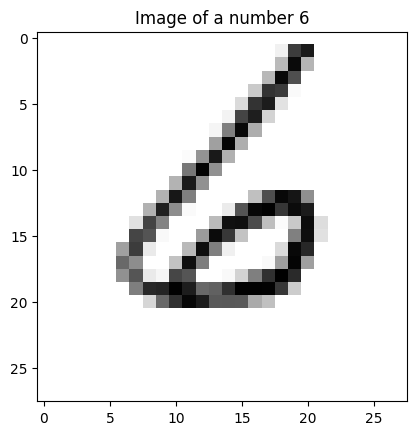

In [43]:
# Displaying sample image

sample = random.randint(0, 60000)
image = x_train[sample]
label = y_train[sample]

plt.imshow(np.invert(image), cmap='gray')
plt.title(f'Image of a number {label}')
plt.show()

In [29]:
# Normalizing and reshaping the date to reduce dimensionality

xf1_train = x_train / 255
xf1_test = x_test / 255

xf2_train = xf1_train.reshape((60000, 28*28))
xf2_test = xf1_test.reshape((10000, 28*28))

In [32]:
xf2_train.shape, xf2_test.shape

((60000, 784), (10000, 784))

# 02 Modeling

In [34]:
# Baseline model

ran_for = RandomForestClassifier(n_estimators=100, random_state=50)
ran_for.fit(xf2_train, y_train)
predicted = ran_for.predict(xf2_test)
accuracy_score(y_test, predicted)

0.969

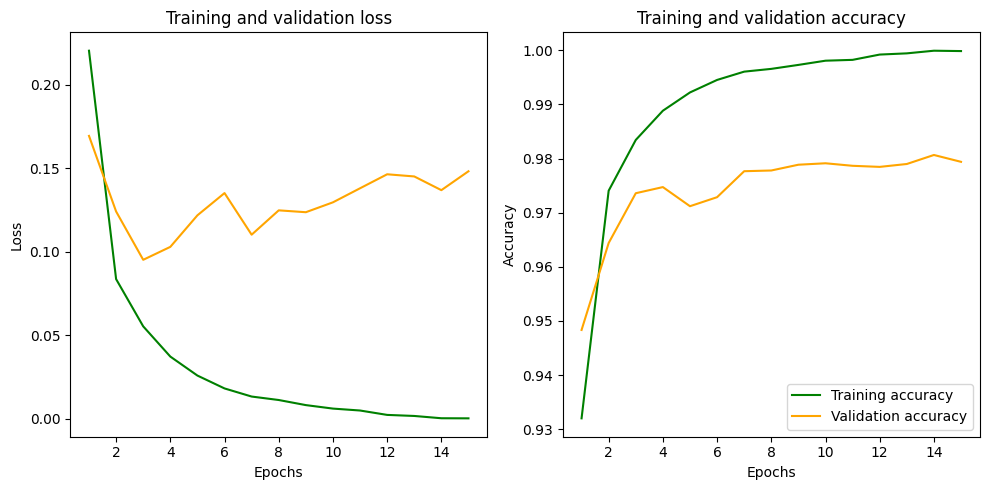

313/313 [==============================] - 1s 3ms/step - loss: 0.1048 - accuracy: 0.9856


[0.1048293486237526, 0.9855999946594238]

In [47]:
# DNN

model1 = keras.Sequential([
    layers.Dense(28*28, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(xf2_train, y_train, epochs=15, batch_size=64, validation_split=0.25, verbose=0)

history_dict1 = history1.history
loss1 = history_dict1['loss']
val_loss1 = history_dict1['val_loss']
acc1 = history_dict1['accuracy']
val_acc1 = history_dict1['val_accuracy']
epochs = range(1, len(loss1)+1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(epochs, loss1, 'g', label='Training loss')
ax[0].plot(epochs, val_loss1, 'orange', label='Validation loss')
ax[0].set_title("Training and validation loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(epochs, acc1, 'g', label='Training accuracy')
ax[1].plot(epochs, val_acc1, 'orange', label='Validation accuracy')
ax[1].set_title("Training and validation accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.legend()
plt.show()

model1.evaluate(xf2_test, y_test)

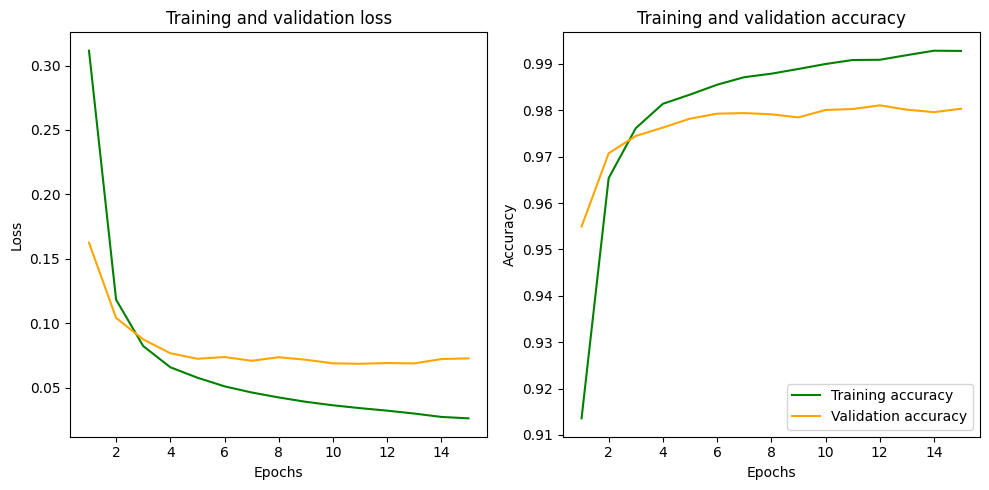

313/313 [==============================] - 1s 3ms/step - loss: 0.0562 - accuracy: 0.9830


[0.05619373917579651, 0.9829999804496765]

In [52]:
# CNN (less complex)

model2 = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(xf1_train, y_train, epochs=15, batch_size=64, validation_split=0.25, verbose=0)

history_dict2 = history2.history
loss2 = history_dict2['loss']
val_loss2 = history_dict2['val_loss']
acc2 = history_dict2['accuracy']
val_acc2 = history_dict2['val_accuracy']
epochs = range(1, len(loss2)+1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(epochs, loss2, 'g', label='Training loss')
ax[0].plot(epochs, val_loss2, 'orange', label='Validation loss')
ax[0].set_title("Training and validation loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(epochs, acc2, 'g', label='Training accuracy')
ax[1].plot(epochs, val_acc2, 'orange', label='Validation accuracy')
ax[1].set_title("Training and validation accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.legend()
plt.show()

model2.evaluate(xf1_test, y_test)

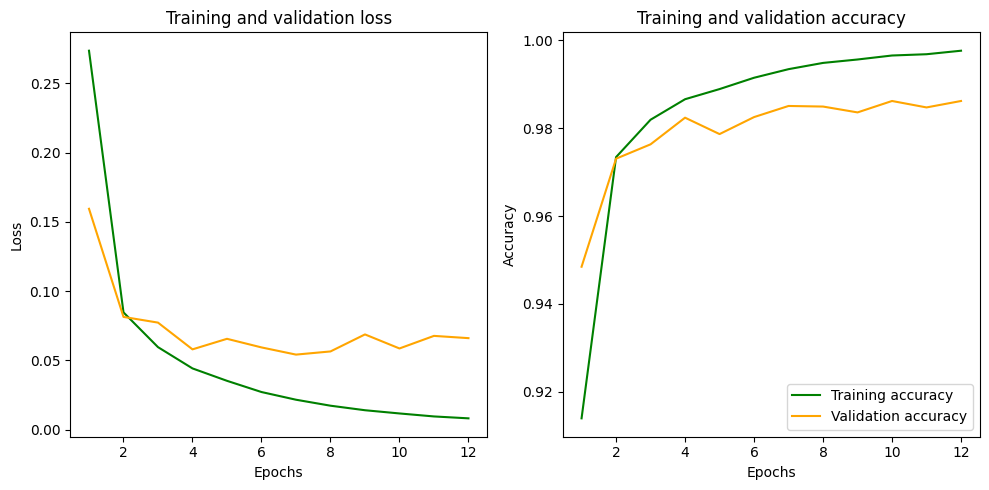

313/313 [==============================] - 2s 6ms/step - loss: 0.0655 - accuracy: 0.9867


[0.06554695218801498, 0.9866999983787537]

In [55]:
# CNN (more complex)

model3 = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(xf1_train, y_train, epochs=12, batch_size=64, validation_split=0.25, verbose=0)

history_dict3 = history3.history
loss3 = history_dict3['loss']
val_loss3 = history_dict3['val_loss']
acc3 = history_dict3['accuracy']
val_acc3 = history_dict3['val_accuracy']
epochs = range(1, len(loss3)+1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(epochs, loss3, 'g', label='Training loss')
ax[0].plot(epochs, val_loss3, 'orange', label='Validation loss')
ax[0].set_title("Training and validation loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(epochs, acc3, 'g', label='Training accuracy')
ax[1].plot(epochs, val_acc3, 'orange', label='Validation accuracy')
ax[1].set_title("Training and validation accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.legend()
plt.show()

model3.evaluate(xf1_test, y_test)

# Results and conclusions

The evaluated accuracies of the models are as follows:
*   Random Forest (baseline) - 96.9%
*   DNN - 98.6%
*   CNN (less complex) - 98.3%
*   CNN (more complex) - 98.7%

Although both the baseline model and the neural networks performed exquisitely on the task, we can see a slight improvement in accuracy between the random forest classifier and the neural networks.

We can safely assume that in this example the difference in performance between a DNN and CNNs is minor. It is still worth noting that despite very similar accuracy performance, the validation loss during training of the DNN model was significantly higher than that of the CNNs, suggesting a healthier development of the CNNs.